<a href="https://colab.research.google.com/github/jinijinhee/Association/blob/main/%EA%B5%B0%EC%A7%91_%ED%99%A9%EC%A7%84%ED%9D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#공유자동차 2차 전처리

## 데이터 할당

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import math
import pandas as pd

In [ ]:
df_day = pd.read_csv('./drive/MyDrive/df_주간_full.csv')
df_off = pd.read_csv('./drive/MyDrive/df_야간_full.csv')

##전처리

###시간대 변수 추가

In [ ]:
#datetime으로 변환
df_day['s_Datetime'] = pd.to_datetime(df_day['s_date'], format="%Y-%m-%d %H:%M")
df_day['e_Datetime'] = pd.to_datetime(df_day['e_date'], format="%Y-%m-%d %H:%M")

#시작시간 분리
df_day['s_hour'] = df_day['s_Datetime'].dt.hour

#datetime으로 변환
df_off['s_Datetime'] = pd.to_datetime(df_off['s_date'], format="%Y-%m-%d %H:%M")
df_off['e_Datetime'] = pd.to_datetime(df_off['e_date'], format="%Y-%m-%d %H:%M")

#시작시간 분리
df_off['s_hour'] = df_off['s_Datetime'].dt.hour

In [ ]:
def divide_hour(x):
  if (x >= 0) & (x <= 5):
    return 0
  
  else :
    return 1

In [ ]:
df_day['day_or_night'] = df_day['s_hour'].apply(lambda x: divide_hour(x))
df_off['day_or_night'] = df_off['s_hour'].apply(lambda x: divide_hour(x))

In [ ]:
df_day = df_day[df_day['day_or_night'] == 1]
df_off = df_off[df_off['day_or_night'] == 0]

In [ ]:
df=pd.concat([df_day,df_off])
df

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,...,e_teukbyulsi/goon/gu,e_dong/eup/myun,road_list,duration,fee,root_dist,s_Datetime,e_Datetime,s_hour,day_or_night
0,2022-02-21 8:00,2022-02-21 8:00,35.157008,128.946497,35.186963,128.820095,0.000000,0,0,0,...,김해시,장유면,NaN,NaN,NaN,NaN,2022-02-21 08:00:00,2022-02-21 08:00:00,8,1
4,2022-04-04 23:00,2022-04-04 23:00,37.561478,126.830995,37.553017,126.811130,3051.400000,118,136,87,...,김포공항화물청사,NaN,정체 마곡중앙8로 248m 서행 공항대로 2.3km 서행 하늘길 410m,13분,"6,000원",4.4km,2022-04-04 23:00:00,2022-04-04 23:00:00,23,1
6,2022-04-05 8:00,2022-04-05 9:00,37.560787,126.839847,37.580907,126.920642,2788.680000,289,311,138,...,서대문구,증가로12나길,정체 올림픽대로 2.3km 서행 가양대로 2.1km 서행 수색로 3km,30분,"13,390원",12km,2022-04-05 08:00:00,2022-04-05 09:00:00,8,1
8,2022-04-07 6:00,2022-04-07 7:00,37.559647,126.834142,37.580973,126.920535,4501.570000,271,209,245,...,서대문구,증가로12나길,정체 올림픽대로 2.3km 서행 가양대로 2.1km 서행 수색로 3km,32분,"13,790원",12km,2022-04-07 06:00:00,2022-04-07 07:00:00,6,1
9,2022-04-07 21:00,2022-04-07 21:00,37.559500,126.837552,37.558408,126.834615,2055.300000,48,49,28,...,강서구,발산1동,정체 마곡중앙6로 396m 정체 마곡동로 153m 정체 공항대로 40m,3분,"3,800원",695m,2022-04-07 21:00:00,2022-04-07 21:00:00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18659,2022-01-07 0:00,2022-01-07 1:00,35.176950,128.950843,35.176718,128.950958,901.130000,0,0,0,...,강서구,대저2동,미확인 공항앞길 15m,1분,"4,550원",25m,2022-01-07 00:00:00,2022-01-07 01:00:00,0,0
18663,2022-01-08 2:00,2022-01-08 2:00,35.176622,128.950603,35.225837,128.885267,2181.600000,242,485,419,...,김해시,부원동,미확인 공항로 2.9km 원활 낙동북로 4.3km 원활 김해대로 4.4km,17분,"20,750원",14km,2022-01-08 02:00:00,2022-01-08 02:00:00,2,0
18665,2022-01-11 2:00,2022-01-11 2:00,35.176665,128.950713,35.176667,128.950685,1518.720000,0,0,0,...,강서구,대저2동,NaN,1분,"4,550원",3m,2022-01-11 02:00:00,2022-01-11 02:00:00,2,0
18667,2022-01-12 3:00,2022-01-12 3:00,35.176910,128.950972,35.116442,129.041988,3574.320000,158,280,319,...,동구,초량동,서행 남해제2고속도로지선 2.8km 원활 학감대로 2km 원활 보수대로 3.6km,21분,"20,410원",15km,2022-01-12 03:00:00,2022-01-12 03:00:00,3,0


###road_split

In [ ]:
df['road_1'] = df["road_list"].str.split(" ", expand=True)[1]
df['road_2'] = df["road_list"].str.split(" ", expand=True)[4]
df['road_3'] = df["road_list"].str.split(" ", expand=True)[7]
df.tail()

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,...,duration,fee,root_dist,s_Datetime,e_Datetime,s_hour,day_or_night,road_1,road_2,road_3
18659,2022-01-07 0:00,2022-01-07 1:00,35.176950,128.950843,35.176718,128.950958,901.130000,0,0,0,...,1분,"4,550원",25m,2022-01-07 00:00:00,2022-01-07 01:00:00,0,0,공항앞길,None,None
18663,2022-01-08 2:00,2022-01-08 2:00,35.176622,128.950603,35.225837,128.885267,2181.600000,242,485,419,...,17분,"20,750원",14km,2022-01-08 02:00:00,2022-01-08 02:00:00,2,0,공항로,낙동북로,김해대로
18665,2022-01-11 2:00,2022-01-11 2:00,35.176665,128.950713,35.176667,128.950685,1518.720000,0,0,0,...,1분,"4,550원",3m,2022-01-11 02:00:00,2022-01-11 02:00:00,2,0,NaN,NaN,NaN
18667,2022-01-12 3:00,2022-01-12 3:00,35.176910,128.950972,35.116442,129.041988,3574.320000,158,280,319,...,21분,"20,410원",15km,2022-01-12 03:00:00,2022-01-12 03:00:00,3,0,남해제2고속도로지선,학감대로,보수대로
18668,2022-02-10 3:00,2022-02-10 3:00,35.163775,128.954238,35.153367,128.985040,1844.784546,129,65,90,...,8분,"9,790원",5.9km,2022-02-10 03:00:00,2022-02-10 03:00:00,3,0,공항로,남해제2고속도로지선,가야대로


In [ ]:
df['road_1'].fillna('-',inplace=True)
df['road_2'].fillna('-',inplace=True)
df['road_3'].fillna('-',inplace=True)

In [ ]:
df['path'] = df['road_1'] +',' + df['road_2'] +',' +  df['road_3']

In [ ]:
df.path.apply(lambda x : x.strip(','))

0                       -,-,-
4             마곡중앙8로,공항대로,하늘길
6              올림픽대로,가양대로,수색로
8              올림픽대로,가양대로,수색로
9            마곡중앙6로,마곡동로,공항대로
                 ...         
18659                공항앞길,-,-
18663           공항로,낙동북로,김해대로
18665                   -,-,-
18667    남해제2고속도로지선,학감대로,보수대로
18668     공항로,남해제2고속도로지선,가야대로
Name: path, Length: 18669, dtype: object

### 시간(duration) 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18669 entries, 0 to 18668
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   s_date                18669 non-null  object        
 1   e_date                18669 non-null  object        
 2   s_lat                 18669 non-null  float64       
 3   s_lng                 18669 non-null  float64       
 4   e_lat                 18669 non-null  float64       
 5   e_lng                 18669 non-null  float64       
 6   max_rpm               18669 non-null  float64       
 7   s20                   18669 non-null  int64         
 8   s30                   18669 non-null  int64         
 9   s40                   18669 non-null  int64         
 10  s50                   18669 non-null  int64         
 11  s60                   18669 non-null  int64         
 12  s70                   18669 non-null  int64         
 13  s80             

In [ ]:
df.dropna(subset=['duration'], inplace = True)

In [ ]:
def calc_time(x) :
  x = x.replace('분', '')
  if '시간' in x :
    try :
      hour, min = x.split('시간 ')
      a = int(hour)*60 + int(min)
    except ValueError:
      hour = x.replace('시간', '')
      a = int(hour)*60
  else :
    a = int(x)
  return a

In [ ]:
df['duration(min)'] = df.duration.apply(lambda x : calc_time(x))
df.drop('duration', axis =1, inplace = True)
df.head()

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,...,root_dist,s_Datetime,e_Datetime,s_hour,day_or_night,road_1,road_2,road_3,path,duration(min)
4,2022-04-04 23:00,2022-04-04 23:00,37.561478,126.830995,37.553017,126.811130,3051.40,118,136,87,...,4.4km,2022-04-04 23:00:00,2022-04-04 23:00:00,23,1,마곡중앙8로,공항대로,하늘길,"마곡중앙8로,공항대로,하늘길",13
6,2022-04-05 8:00,2022-04-05 9:00,37.560787,126.839847,37.580907,126.920642,2788.68,289,311,138,...,12km,2022-04-05 08:00:00,2022-04-05 09:00:00,8,1,올림픽대로,가양대로,수색로,"올림픽대로,가양대로,수색로",30
8,2022-04-07 6:00,2022-04-07 7:00,37.559647,126.834142,37.580973,126.920535,4501.57,271,209,245,...,12km,2022-04-07 06:00:00,2022-04-07 07:00:00,6,1,올림픽대로,가양대로,수색로,"올림픽대로,가양대로,수색로",32
9,2022-04-07 21:00,2022-04-07 21:00,37.559500,126.837552,37.558408,126.834615,2055.30,48,49,28,...,695m,2022-04-07 21:00:00,2022-04-07 21:00:00,21,1,마곡중앙6로,마곡동로,공항대로,"마곡중앙6로,마곡동로,공항대로",3
10,2022-04-07 23:00,2022-04-08 0:00,37.558408,126.834615,37.514610,126.828983,2840.31,163,160,183,...,7.5km,2022-04-07 23:00:00,2022-04-08 00:00:00,23,1,강서로,화곡로,남부순환로,"강서로,화곡로,남부순환로",24


In [ ]:
df

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,...,root_dist,s_Datetime,e_Datetime,s_hour,day_or_night,road_1,road_2,road_3,path,duration(min)
4,2022-04-04 23:00,2022-04-04 23:00,37.561478,126.830995,37.553017,126.811130,3051.400000,118,136,87,...,4.4km,2022-04-04 23:00:00,2022-04-04 23:00:00,23,1,마곡중앙8로,공항대로,하늘길,"마곡중앙8로,공항대로,하늘길",13
6,2022-04-05 8:00,2022-04-05 9:00,37.560787,126.839847,37.580907,126.920642,2788.680000,289,311,138,...,12km,2022-04-05 08:00:00,2022-04-05 09:00:00,8,1,올림픽대로,가양대로,수색로,"올림픽대로,가양대로,수색로",30
8,2022-04-07 6:00,2022-04-07 7:00,37.559647,126.834142,37.580973,126.920535,4501.570000,271,209,245,...,12km,2022-04-07 06:00:00,2022-04-07 07:00:00,6,1,올림픽대로,가양대로,수색로,"올림픽대로,가양대로,수색로",32
9,2022-04-07 21:00,2022-04-07 21:00,37.559500,126.837552,37.558408,126.834615,2055.300000,48,49,28,...,695m,2022-04-07 21:00:00,2022-04-07 21:00:00,21,1,마곡중앙6로,마곡동로,공항대로,"마곡중앙6로,마곡동로,공항대로",3
10,2022-04-07 23:00,2022-04-08 0:00,37.558408,126.834615,37.514610,126.828983,2840.310000,163,160,183,...,7.5km,2022-04-07 23:00:00,2022-04-08 00:00:00,23,1,강서로,화곡로,남부순환로,"강서로,화곡로,남부순환로",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18659,2022-01-07 0:00,2022-01-07 1:00,35.176950,128.950843,35.176718,128.950958,901.130000,0,0,0,...,25m,2022-01-07 00:00:00,2022-01-07 01:00:00,0,0,공항앞길,-,-,"공항앞길,-,-",1
18663,2022-01-08 2:00,2022-01-08 2:00,35.176622,128.950603,35.225837,128.885267,2181.600000,242,485,419,...,14km,2022-01-08 02:00:00,2022-01-08 02:00:00,2,0,공항로,낙동북로,김해대로,"공항로,낙동북로,김해대로",17
18665,2022-01-11 2:00,2022-01-11 2:00,35.176665,128.950713,35.176667,128.950685,1518.720000,0,0,0,...,3m,2022-01-11 02:00:00,2022-01-11 02:00:00,2,0,-,-,-,"-,-,-",1
18667,2022-01-12 3:00,2022-01-12 3:00,35.176910,128.950972,35.116442,129.041988,3574.320000,158,280,319,...,15km,2022-01-12 03:00:00,2022-01-12 03:00:00,3,0,남해제2고속도로지선,학감대로,보수대로,"남해제2고속도로지선,학감대로,보수대로",21


###요금(fee) 전처리

In [ ]:
df.fee.replace(',','',regex=True,inplace=True)
df.fee.replace('원','',regex=True,inplace=True)
df.fee = df.fee.apply(pd.to_numeric)

###총 거리(root_dist) 전처리

In [ ]:
def root_dist_def(x) :
  if 'km' in x :
    x = x.replace('km', '')
    pass
  else :
    x = float(x.replace('m', ''))*0.001
  return x

In [ ]:
df['root_dist(km)'] = df.root_dist.apply(lambda x : root_dist_def(x))
df.drop('root_dist', axis =1, inplace = True)
df['root_dist(km)'] = df['root_dist(km)'].apply(pd.to_numeric)

In [ ]:
df['root_dist(km)']

4         4.400
6        12.000
8        12.000
9         0.695
10        7.500
          ...  
18659     0.025
18663    14.000
18665     0.003
18667    15.000
18668     5.900
Name: root_dist(km), Length: 15490, dtype: float64

# 군집

In [ ]:
df.columns

Index(['s_date', 'e_date', 's_lat', 's_lng', 'e_lat', 'e_lng', 'max_rpm',
       's20', 's30', 's40', 's50', 's60', 's70', 's80', 's90', 's100', 's110',
       's120', 's130', 's140', 's150', 'start_gps', 'end_gps', 'distance',
       'airport_start', 'airport_end', 'start_add', 'end_add',
       's_teukbyul_si/do', 's_teukbyulsi/goon/gu', 's_dong/eup/myun',
       'e_teukbyulsi/do', 'e_teukbyulsi/goon/gu', 'e_dong/eup/myun',
       'road_list', 'fee', 's_Datetime', 'e_Datetime', 's_hour',
       'day_or_night', 'road_1', 'road_2', 'road_3', 'path', 'duration(min)',
       'root_dist(km)', 'clusters', 'ss'],
      dtype='object')

In [100]:
k_df=df[['duration(min)','root_dist(km)','distance']]

In [101]:
from sklearn.preprocessing import MinMaxScaler

# 정규화 진행
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(k_df)

In [102]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scale)

clusters = kmeans.fit(k_df)
k_df['clusters'] = clusters.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [103]:
k_df['clusters'].value_counts()

0    12589
2     2406
1      495
Name: clusters, dtype: int64

In [104]:
k_df[k_df['clusters']==0].describe()

,duration(min),root_dist(km),distance,clusters
count,12589.000000,12589.000000,12589.000000,12589.0
mean,2.769164,1.423697,0.771207,0.0
std,3.488293,2.495403,1.482463,0.0
min,1.000000,0.001000,0.000600,0.0
25%,1.000000,0.026000,0.028273,0.0
50%,1.000000,0.444000,0.110594,0.0
75%,3.000000,1.200000,0.631526,0.0
max,23.000000,16.000000,11.632386,0.0


In [ ]:
k_df[k_df['clusters']==1].describe()

,duration(min),root_dist(km),distance,clusters
count,495.000000,495.000000,495.000000,495.0
mean,61.303030,65.076768,46.381577,1.0
std,22.217299,30.492950,16.872300,0.0
min,35.000000,33.000000,0.005254,1.0
25%,47.000000,48.000000,33.867271,1.0
50%,59.000000,59.000000,42.562673,1.0
75%,71.000000,72.000000,54.497581,1.0
max,322.000000,414.000000,116.428780,1.0


In [ ]:
k_df[k_df['clusters']==2].describe()

,duration(min),root_dist(km),distance,clusters
count,2406.000000,2406.000000,2406.000000,2406.0
mean,28.184539,22.732751,15.146895,2.0
std,9.362909,8.897954,6.999680,0.0
min,13.000000,6.900000,0.044579,2.0
25%,21.000000,15.000000,10.328369,2.0
50%,27.000000,20.000000,13.258591,2.0
75%,33.000000,30.000000,19.668551,2.0
max,74.000000,55.000000,41.199196,2.0


In [ ]:
df['clusters'] = k_df['clusters']

In [ ]:
df

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,...,s_hour,day_or_night,road_1,road_2,road_3,path,duration(min),root_dist(km),clusters,ss
4,2022-04-04 23:00,2022-04-04 23:00,37.561478,126.830995,37.553017,126.811130,3051.400000,118,136,87,...,23,1,마곡중앙8로,공항대로,하늘길,"마곡중앙8로,공항대로,하늘길",13,4.400,0,69
6,2022-04-05 8:00,2022-04-05 9:00,37.560787,126.839847,37.580907,126.920642,2788.680000,289,311,138,...,8,1,올림픽대로,가양대로,수색로,"올림픽대로,가양대로,수색로",30,12.000,2,284
8,2022-04-07 6:00,2022-04-07 7:00,37.559647,126.834142,37.580973,126.920535,4501.570000,271,209,245,...,6,1,올림픽대로,가양대로,수색로,"올림픽대로,가양대로,수색로",32,12.000,2,330
9,2022-04-07 21:00,2022-04-07 21:00,37.559500,126.837552,37.558408,126.834615,2055.300000,48,49,28,...,21,1,마곡중앙6로,마곡동로,공항대로,"마곡중앙6로,마곡동로,공항대로",3,0.695,0,0
10,2022-04-07 23:00,2022-04-08 0:00,37.558408,126.834615,37.514610,126.828983,2840.310000,163,160,183,...,23,1,강서로,화곡로,남부순환로,"강서로,화곡로,남부순환로",24,7.500,2,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18659,2022-01-07 0:00,2022-01-07 1:00,35.176950,128.950843,35.176718,128.950958,901.130000,0,0,0,...,0,0,공항앞길,-,-,"공항앞길,-,-",1,0.025,0,0
18663,2022-01-08 2:00,2022-01-08 2:00,35.176622,128.950603,35.225837,128.885267,2181.600000,242,485,419,...,2,0,공항로,낙동북로,김해대로,"공항로,낙동북로,김해대로",17,14.000,2,137
18665,2022-01-11 2:00,2022-01-11 2:00,35.176665,128.950713,35.176667,128.950685,1518.720000,0,0,0,...,2,0,-,-,-,"-,-,-",1,0.003,0,0
18667,2022-01-12 3:00,2022-01-12 3:00,35.176910,128.950972,35.116442,129.041988,3574.320000,158,280,319,...,3,0,남해제2고속도로지선,학감대로,보수대로,"남해제2고속도로지선,학감대로,보수대로",21,15.000,2,385


In [ ]:
df[df['clusters']==2].describe()

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,...,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),clusters,ss
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,...,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.0,2406.000000
mean,35.412417,128.730712,35.412960,128.766432,2901.289274,221.049875,206.698670,229.356193,250.586451,224.794680,...,0.308396,0.056941,15.146895,29660.793849,6.025353,0.378637,28.184539,22.732751,2.0,841.224023
std,0.716653,0.654926,0.716777,0.667328,900.789767,165.876800,139.516526,147.065666,151.536106,157.525684,...,5.736674,1.402878,6.999680,12200.131218,6.646508,0.485148,9.362909,8.897954,0.0,491.879880
min,35.100135,126.371938,34.927332,126.372235,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.044579,8000.000000,0.000000,0.000000,13.000000,6.900000,2.0,0.000000
25%,35.176688,128.950637,35.117425,128.816036,2377.867500,103.000000,107.000000,124.000000,146.000000,109.000000,...,0.000000,0.000000,10.328369,20310.000000,1.000000,0.000000,21.000000,15.000000,2.0,503.000000
50%,35.176832,128.950793,35.168143,129.010735,2811.000000,181.000000,181.000000,202.000000,227.000000,199.000000,...,0.000000,0.000000,13.258591,26080.000000,4.000000,0.000000,27.000000,20.000000,2.0,722.000000
75%,35.177057,128.950923,35.249547,129.077394,3400.950000,294.750000,278.000000,304.000000,329.000000,309.000000,...,0.000000,0.000000,19.668551,37897.500000,8.000000,1.000000,33.000000,30.000000,2.0,1152.750000
max,37.579997,128.969788,37.728485,129.269827,6442.990000,1479.000000,1180.000000,1373.000000,1064.000000,1335.000000,...,177.000000,57.000000,41.199196,68470.000000,23.000000,1.000000,74.000000,55.000000,2.0,3741.000000


In [ ]:
df[df['clusters']==1].describe()

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,...,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),clusters,ss
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.000000
mean,35.714460,128.446619,35.724336,128.332682,3380.356806,221.359596,207.086869,244.961616,324.414141,385.585859,...,4.238384,1.058586,46.381577,82768.363636,7.323232,0.442424,61.303030,65.076768,1.0,2554.331313
std,0.992694,0.931236,1.001646,0.746855,926.242890,188.755073,135.453424,162.892356,215.367749,265.590428,...,19.864616,7.313304,16.872300,38795.103409,7.914815,0.497176,22.217299,30.492950,0.0,879.638304
min,35.100382,126.371837,34.714418,126.370152,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005254,31600.000000,0.000000,0.000000,35.000000,33.000000,1.0,0.000000
25%,35.176772,128.949258,34.966196,128.054059,2760.165000,102.500000,112.000000,141.000000,173.000000,200.500000,...,0.000000,0.000000,33.867271,60190.000000,1.000000,0.000000,47.000000,48.000000,1.0,1971.500000
50%,35.176878,128.950768,35.294398,128.564175,3286.800000,166.000000,187.000000,216.000000,274.000000,333.000000,...,0.000000,0.000000,42.562673,76740.000000,4.000000,0.000000,59.000000,59.000000,1.0,2411.000000
75%,35.180070,128.950913,35.851671,128.727217,3906.645000,279.000000,265.000000,314.500000,426.000000,510.500000,...,0.000000,0.000000,54.497581,96355.000000,9.000000,1.000000,71.000000,72.000000,1.0,2994.000000
max,37.578498,128.961867,37.742347,129.553570,6358.318359,1582.000000,880.000000,1379.000000,1807.000000,1736.000000,...,188.000000,89.000000,116.428780,375530.000000,23.000000,1.000000,322.000000,414.000000,1.0,5525.000000


In [ ]:
df[df['clusters']==0].describe()

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,...,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),clusters,ss
count,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,...,12589.0,12589.0,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.0,12589.000000
mean,35.390702,128.754071,35.391009,128.755046,1810.632472,41.449043,39.009453,29.823179,20.561840,11.498610,...,0.0,0.0,0.771207,5030.312972,6.719596,0.489316,2.769164,1.423697,0.0,40.614108
std,0.685601,0.621282,0.685449,0.620556,750.496569,67.430745,64.554697,52.380114,43.271054,32.594078,...,0.0,0.0,1.482463,2381.606520,6.106916,0.499906,3.488293,2.495403,0.0,90.198338
min,35.100283,126.370152,35.047025,126.371832,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000600,3800.000000,0.000000,0.000000,1.000000,0.001000,0.0,0.000000
25%,35.176675,128.950663,35.176723,128.950662,1445.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.028273,3800.000000,2.000000,0.000000,1.000000,0.026000,0.0,0.000000
50%,35.176825,128.950892,35.176897,128.950855,1813.680000,20.000000,16.000000,4.000000,0.000000,0.000000,...,0.0,0.0,0.110594,4550.000000,5.000000,0.000000,1.000000,0.444000,0.0,0.000000
75%,35.177438,128.951125,35.177492,128.951047,2185.050000,57.000000,56.000000,42.000000,25.000000,3.000000,...,0.0,0.0,0.631526,4550.000000,9.000000,1.000000,3.000000,1.200000,0.0,41.000000
max,37.579988,128.969813,37.619642,129.055000,6150.360000,1811.000000,1432.000000,984.000000,725.000000,427.000000,...,0.0,0.0,11.632386,22210.000000,23.000000,1.000000,23.000000,16.000000,0.0,1535.000000


In [ ]:
df[df['clusters']==0].describe() #단거리

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,...,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),clusters,ss
count,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,...,12589.0,12589.0,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.0,12589.000000
mean,35.390702,128.754071,35.391009,128.755046,1810.632472,41.449043,39.009453,29.823179,20.561840,11.498610,...,0.0,0.0,0.771207,5030.312972,6.719596,0.489316,2.769164,1.423697,0.0,40.614108
std,0.685601,0.621282,0.685449,0.620556,750.496569,67.430745,64.554697,52.380114,43.271054,32.594078,...,0.0,0.0,1.482463,2381.606520,6.106916,0.499906,3.488293,2.495403,0.0,90.198338
min,35.100283,126.370152,35.047025,126.371832,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000600,3800.000000,0.000000,0.000000,1.000000,0.001000,0.0,0.000000
25%,35.176675,128.950663,35.176723,128.950662,1445.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.028273,3800.000000,2.000000,0.000000,1.000000,0.026000,0.0,0.000000
50%,35.176825,128.950892,35.176897,128.950855,1813.680000,20.000000,16.000000,4.000000,0.000000,0.000000,...,0.0,0.0,0.110594,4550.000000,5.000000,0.000000,1.000000,0.444000,0.0,0.000000
75%,35.177438,128.951125,35.177492,128.951047,2185.050000,57.000000,56.000000,42.000000,25.000000,3.000000,...,0.0,0.0,0.631526,4550.000000,9.000000,1.000000,3.000000,1.200000,0.0,41.000000
max,37.579988,128.969813,37.619642,129.055000,6150.360000,1811.000000,1432.000000,984.000000,725.000000,427.000000,...,0.0,0.0,11.632386,22210.000000,23.000000,1.000000,23.000000,16.000000,0.0,1535.000000


In [ ]:
df[df['clusters']==1].describe() #장거리

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,...,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),clusters,ss
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.000000
mean,35.714460,128.446619,35.724336,128.332682,3380.356806,221.359596,207.086869,244.961616,324.414141,385.585859,...,4.238384,1.058586,46.381577,82768.363636,7.323232,0.442424,61.303030,65.076768,1.0,2554.331313
std,0.992694,0.931236,1.001646,0.746855,926.242890,188.755073,135.453424,162.892356,215.367749,265.590428,...,19.864616,7.313304,16.872300,38795.103409,7.914815,0.497176,22.217299,30.492950,0.0,879.638304
min,35.100382,126.371837,34.714418,126.370152,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005254,31600.000000,0.000000,0.000000,35.000000,33.000000,1.0,0.000000
25%,35.176772,128.949258,34.966196,128.054059,2760.165000,102.500000,112.000000,141.000000,173.000000,200.500000,...,0.000000,0.000000,33.867271,60190.000000,1.000000,0.000000,47.000000,48.000000,1.0,1971.500000
50%,35.176878,128.950768,35.294398,128.564175,3286.800000,166.000000,187.000000,216.000000,274.000000,333.000000,...,0.000000,0.000000,42.562673,76740.000000,4.000000,0.000000,59.000000,59.000000,1.0,2411.000000
75%,35.180070,128.950913,35.851671,128.727217,3906.645000,279.000000,265.000000,314.500000,426.000000,510.500000,...,0.000000,0.000000,54.497581,96355.000000,9.000000,1.000000,71.000000,72.000000,1.0,2994.000000
max,37.578498,128.961867,37.742347,129.553570,6358.318359,1582.000000,880.000000,1379.000000,1807.000000,1736.000000,...,188.000000,89.000000,116.428780,375530.000000,23.000000,1.000000,322.000000,414.000000,1.0,5525.000000


In [ ]:
df[df['clusters']==2].describe() #중거리

,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,...,s140,s150,distance,fee,s_hour,day_or_night,duration(min),root_dist(km),clusters,ss
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,...,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.0,2406.000000
mean,35.412417,128.730712,35.412960,128.766432,2901.289274,221.049875,206.698670,229.356193,250.586451,224.794680,...,0.308396,0.056941,15.146895,29660.793849,6.025353,0.378637,28.184539,22.732751,2.0,841.224023
std,0.716653,0.654926,0.716777,0.667328,900.789767,165.876800,139.516526,147.065666,151.536106,157.525684,...,5.736674,1.402878,6.999680,12200.131218,6.646508,0.485148,9.362909,8.897954,0.0,491.879880
min,35.100135,126.371938,34.927332,126.372235,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.044579,8000.000000,0.000000,0.000000,13.000000,6.900000,2.0,0.000000
25%,35.176688,128.950637,35.117425,128.816036,2377.867500,103.000000,107.000000,124.000000,146.000000,109.000000,...,0.000000,0.000000,10.328369,20310.000000,1.000000,0.000000,21.000000,15.000000,2.0,503.000000
50%,35.176832,128.950793,35.168143,129.010735,2811.000000,181.000000,181.000000,202.000000,227.000000,199.000000,...,0.000000,0.000000,13.258591,26080.000000,4.000000,0.000000,27.000000,20.000000,2.0,722.000000
75%,35.177057,128.950923,35.249547,129.077394,3400.950000,294.750000,278.000000,304.000000,329.000000,309.000000,...,0.000000,0.000000,19.668551,37897.500000,8.000000,1.000000,33.000000,30.000000,2.0,1152.750000
max,37.579997,128.969788,37.728485,129.269827,6442.990000,1479.000000,1180.000000,1373.000000,1064.000000,1335.000000,...,177.000000,57.000000,41.199196,68470.000000,23.000000,1.000000,74.000000,55.000000,2.0,3741.000000


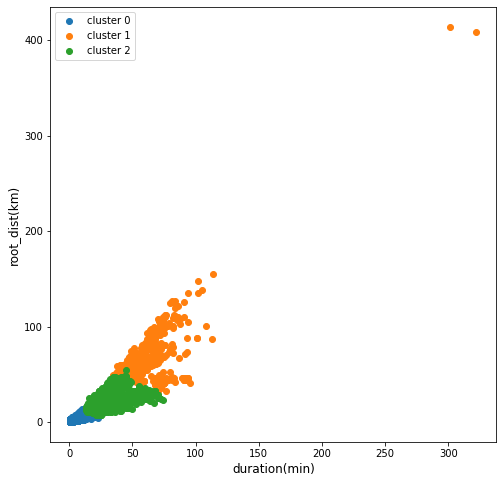

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.scatter(df.loc[df['clusters'] == i, 'duration(min)'], df.loc[df['clusters'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

#재군집

In [ ]:
#과속시간
df['ss'] =df['s50']+df['s60']+df['s70']+df['s80']+df['s90']+df['s100']+df['s110']+df['s120']+df['s130']+df['s140']+df['s150']

In [ ]:
df_short=df[df['clusters']==0]

In [ ]:
short_cluster=df_short[['max_rpm','ss']]

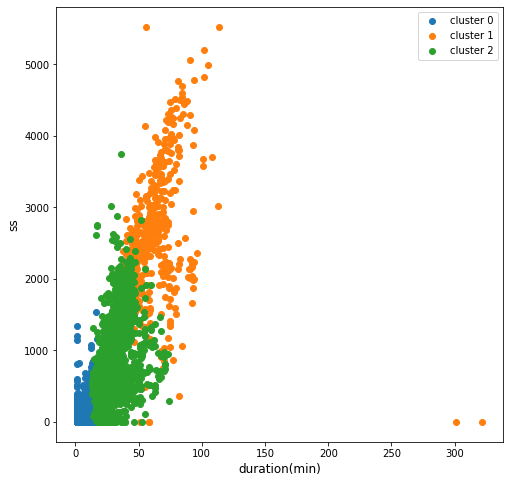

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.scatter(df.loc[df['clusters'] == i, 'duration(min)'], df.loc[df['clusters'] == i, 'ss'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.xlabel('duration(min)', size = 12)
plt.ylabel('ss', size = 12)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(short_cluster)
short_cluster['clusters_2'] = clusters.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
short_cluster[short_cluster['clusters_2']==0].describe()

,max_rpm,ss,clusters_2
count,2288.000000,2288.000000,2288.0
mean,730.284080,6.436626,0.0
std,452.828829,33.452515,0.0
min,-0.090000,0.000000,0.0
25%,291.135000,0.000000,0.0
50%,876.845000,0.000000,0.0
75%,1088.727500,0.000000,0.0
max,1277.820000,548.000000,0.0


In [ ]:
short_cluster[short_cluster['clusters_2']==1].describe()

,max_rpm,ss,clusters_2
count,2178.000000,2178.000000,2178.0
mean,2905.031992,119.017906,1.0
std,571.030548,145.532811,0.0
min,2328.000000,0.000000,1.0
25%,2511.035000,20.000000,1.0
50%,2721.990000,68.500000,1.0
75%,3104.895000,169.000000,1.0
max,6150.360000,1535.000000,1.0


In [ ]:
short_cluster[short_cluster['clusters_2']==2].describe()

,max_rpm,ss,clusters_2
count,8123.000000,8123.000000,8123.0
mean,1821.494834,29.218638,2.0
std,278.793039,67.155430,0.0
min,1278.060000,0.000000,2.0
25%,1603.905000,0.000000,2.0
50%,1817.960000,0.000000,2.0
75%,2040.460000,33.000000,2.0
max,2369.850000,847.000000,2.0
